# Zadanie 1

## Część 1
-> opracowanie rekurencyjnych algorytmów dla macierzy gęstych o złożoności $<n^3$

##### Mnożenie macierzy gęstych

In [ ]:
import numpy as np

In [37]:
def cauchy_binet_recursive(A, B):

    if A.shape[1] != B.shape[0]:  
        raise ValueError("Matrix dimensions are not compatible for multiplication")

    n = A.shape[1]

    if n == 1: 
        return A[0, 0] * B[0, 0], 1

    
    # Split matrices A and B into submatrices
    m = n // 2
    A11, A12 = A[:m, :m], A[:m, m:]
    A21, A22 = A[m:, :m], A[m:, m:]
    B11, B12 = B[:m, :m], B[:m, m:]
    B21, B22 = B[m:, :m], B[m:, m:]

    # Recursively compute subdeterminants
    LU1, count1 = cauchy_binet_recursive(A11, B11)
    LU2, count2 = cauchy_binet_recursive(A12, B21)
    RU1, count3 = cauchy_binet_recursive(A11, B12)
    RU2, count4 = cauchy_binet_recursive(A12, B22)
    LD1, count5 = cauchy_binet_recursive(A21, B11)
    LD2, count6 = cauchy_binet_recursive(A22, B21)
    RD1, count7 = cauchy_binet_recursive(A21, B12)
    RD2, count8 = cauchy_binet_recursive(A22, B22)
    
    result = np.zeros((n, n))
    result[:m, :m] = LU1 + LU2
    result[:m, m:] = RU1 + RU2
    result[m:, :m] = LD1 + LD2
    result[m:, m:] = RD1 + RD2
    
    count = count1 + count2 + count3 + count4 + count5 + count6 + count7 + count8 + 4

    return result, count


In [31]:
def strassen_matrix_multiply(A, B):
    if A.shape[1] != B.shape[0]:
        raise ValueError("Matrix dimensions are not compatible for multiplication")

    if A.shape[0] == 1 and A.shape[1] == 1:
        return A * B, 1

    # Split the matrices into four equal-sized parts
    m = A.shape[0] // 2

    a11, a12 = A[:m, :m], A[:m, m:]
    a21, a22 = A[m:, :m], A[m:, m:]

    b11, b12 = B[:m, :m], B[:m, m:]
    b21, b22 = B[m:, :m], B[m:, m:]

    # Calculate the 7 products P1 to P7 using Strassen's method
    p1, count1 = strassen_matrix_multiply(a11, (b12 - b22))
    p2, count2 = strassen_matrix_multiply((a11 + a12), b22)
    p3, count3 = strassen_matrix_multiply((a21 + a22), b11)
    p4, count4 = strassen_matrix_multiply(a22, (b21 - b11))
    p5, count5 = strassen_matrix_multiply((a11 + a22), (b11 + b22))
    p6, count6 = strassen_matrix_multiply((a12 - a22), (b21 + b22))
    p7, count7 = strassen_matrix_multiply((a11 - a21), (b11 + b12))

    # Calculate the four parts of the result matrix
    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p5 + p1 - p3 - p7

    # Combine the results
    top = np.hstack((c11, c12))
    bottom = np.hstack((c21, c22))
    result = np.vstack((top, bottom))
    
    count = count1 + count2 + count3 + count4 + count5 + count6 + count7 + 18
    
    return result, count

##### Przykładowe testy

In [55]:
A = np.array([[2, 3], [4, 5]])
B = np.array([[1, 2], [8, 7]])

# A = np.array([[1,2], [3,4]])
# B = np.array([[5,6], [7,8]])

result1, _ = cauchy_binet_recursive(A, B)

result2, _ = strassen_matrix_multiply(A, B)

print("Matrix A:")
print(A)
print("Matrix B:")
print(B)
print("Binet:")
print(result1)
print("Strassen:")
print(result2)

Matrix A:
[[2 3]
 [4 5]]
Matrix B:
[[1 2]
 [8 7]]
Binet:
[[26. 25.]
 [44. 43.]]
Strassen:
[[26 25]
 [44 43]]


##### Testy właściwe

In [47]:
# create plot showing on y axis time consumed by cauchy_binet_recursive and on x axis k, where k is in range(2,16) and matrixes are size 2^k x 2^k

import time
from matplotlib import pyplot as plt
x = []
y_t = []
y_op = []
for k in range(2,9):
    n = 2**k
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    start = time.time()
    _, ops = cauchy_binet_recursive(A,B)
    end = time.time()
    x.append(k)
    y_t.append(end-start)
    y_op.append(ops)


Czas potrzebny na wykonanie algorytmu

[0.0, 0.0009996891021728516, 0.006018877029418945, 0.041005611419677734, 0.3799769878387451, 3.0089809894561768, 23.996400833129883]


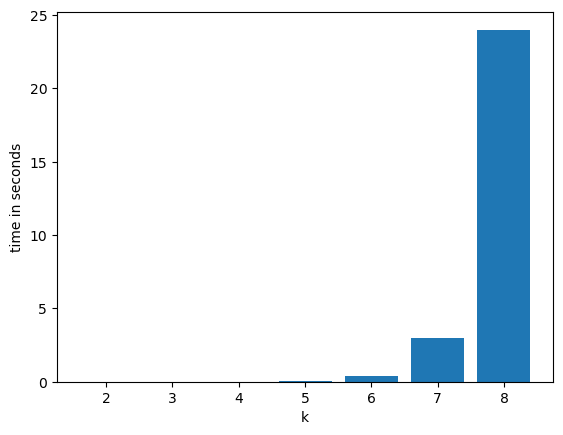

In [50]:
plt.bar(x, y_t)
plt.xlabel('k')
plt.ylabel('time in seconds');
print(y_t)

Ilość operacji

[100, 804, 6436, 51492, 411940, 3295524, 26364196]


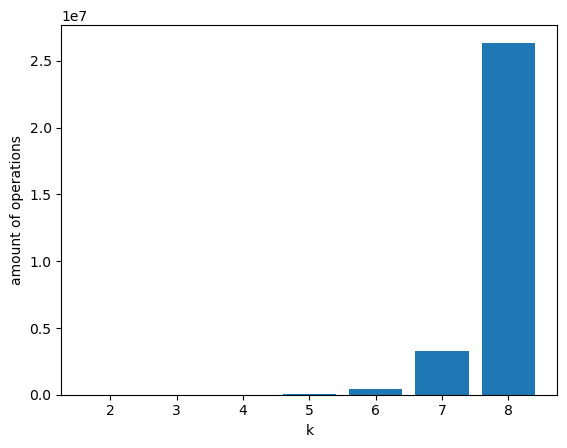

In [51]:
plt.bar(x, y_op)
plt.xlabel('k')
plt.ylabel('amount of operations');
print(y_op)

In [52]:
x_s = []
y_t_s = []
y_op_s = []
for k in range(2,9):
    n = 2**k
    A = np.random.rand(n,n)
    B = np.random.rand(n,n)
    start = time.time()
    _, ops = strassen_matrix_multiply(A,B)
    end = time.time()
    x_s.append(k)
    y_t_s.append(end-start)
    y_op_s.append(ops)

Czas potrzebny na wykonanie algorytmu

[0.0009989738464355469, 0.00400233268737793, 0.01399683952331543, 0.08199954032897949, 0.562999963760376, 3.9270169734954834, 27.185481786727905]


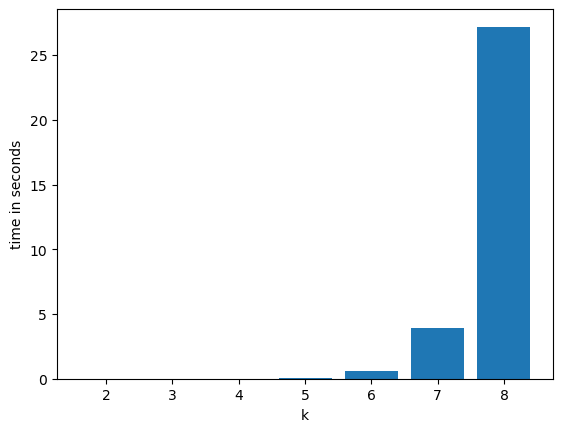

In [53]:
plt.bar(x_s, y_t_s)
plt.xlabel('k')
plt.ylabel('time in seconds');
print(y_t_s)

Ilość operacji

[193, 1369, 9601, 67225, 470593, 3294169, 23059201]


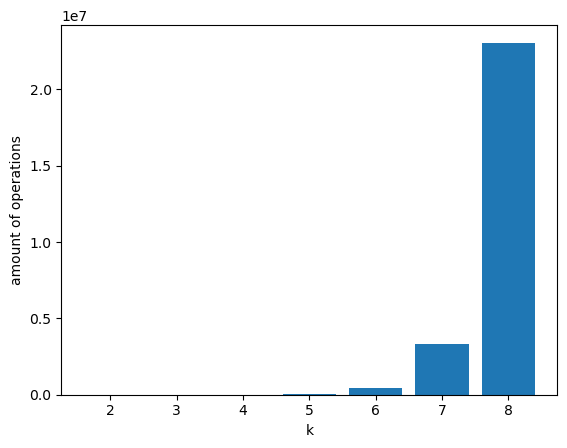

In [54]:
plt.bar(x_s, y_op_s)
plt.xlabel('k')
plt.ylabel('amount of operations');
print(y_op_s)